[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/zhimingkuang/Harvard-AM-115/blob/main/15_graph_theory/vertex_cover_integer_programming.ipynb)

In [ ]:
# If running locally, you may need to install the following packages
# Uncomment any needed and run this block (change pip3 with conda if you use Anaconda)
# !pip3 install pulp

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
import scipy
import networkx as nx
import pulp

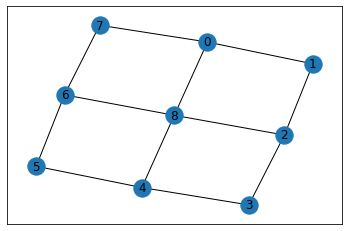

In [2]:
UGS = scipy.sparse.csr_matrix(([1]*12, ([0, 0, 0, 1, 2, 2, 3, 4, 4, 5, 6, 8], [1, 7, 8, 2, 8, 3, 4, 5, 8, 6, 7, 6])), shape=(9,9))
UG = nx.from_scipy_sparse_matrix(UGS)
pos = nx.spring_layout(UG)
network = nx.draw_networkx(UG, pos)
plt.show()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/lib/python3.9/site-packages/pulp/apis/../solverdir/cbc/osx/64/cbc /var/folders/dc/yjt5l_9s0d752c4rt46gd2qh0000gn/T/72094302538f4029b2062f3f8f8b6755-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/dc/yjt5l_9s0d752c4rt46gd2qh0000gn/T/72094302538f4029b2062f3f8f8b6755-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 41 COLUMNS
At line 165 RHS
At line 202 BOUNDS
At line 224 ENDATA
Problem MODEL has 36 rows, 21 columns and 72 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 4 - 0.00 seconds
Cgl0004I processed model has 12 rows, 9 columns (9 integer (9 of which binary)) and 24 elements
Cutoff increment increased from 1e-05 to 0.9999
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of 4
Cbc0038I Before mini branch and bound, 9 in

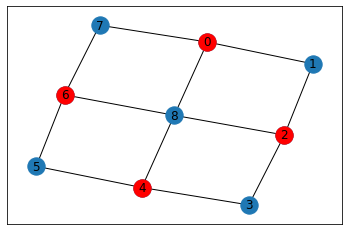

In [3]:
prob = pulp.LpProblem("MinimumSetVertexCover", pulp.LpMinimize)
x = pulp.LpVariable.dicts("x", UG.nodes(), cat=pulp.LpBinary)
z = pulp.LpVariable.dicts("z", UG.edges(), cat=pulp.LpBinary)

# Define the objective function
prob += pulp.lpSum(x)

# Define the constraints
for (u,v) in UG.edges():
    prob += x[u] + x[v] >= 1
    prob += z[(u,v)] <= x[v]
    prob += z[(u,v)] <= 1-x[u]

# Solve
prob.solve()

# Display solution
path = []
for v in UG.nodes():
    if pulp.value(x[v]) > 0.9:
         path.append(v)

network = nx.draw_networkx(UG, pos)
nx.draw_networkx_nodes(UG, pos, nodelist=path, node_color='r')
plt.show()